<a href="https://colab.research.google.com/github/SachinSouravJha/Machine-Learning-Basics/blob/master/TransposedCNN_GAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import * #Will import all layers
from keras.layers.advanced_activations import LeakyReLU #Variation of relu which returns damped value of x if x si negative
from keras.models import Sequential,Model #Will use sequential again but if we use functional then we will need Model
from keras.optimizers import Adam
from keras.datasets import mnist #The dataset
import matplotlib.pyplot as plt
import math
import numpy as np

Using TensorFlow backend.


In [2]:
(X_Train,_),(_,_) = mnist.load_data()
#We don't need Y here because we will learn ourselves
#Xtest and Ytest will be generated by us


11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(X_Train.shape)
print(type(X_Train))

X_Train = X_Train.reshape((*(X_Train.shape),1)) #reshaping the data to suit the requirements 
print(X_Train.shape)

(60000, 28, 28)
<class 'numpy.ndarray'>
(60000, 28, 28, 1)


In [4]:
#Normalize the Data between -1 and 1

X_Train = (X_Train.astype('float32') - 127.5)/127.5 #The values will now be between -1 and 1

print(np.min(X_Train)) #The least value
print(np.max(X_Train)) #The maximum value 

-1.0
1.0


In [0]:
NUM_EPOCHS = 50 #Will run 50 times
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE)) #So we will his number of batches
HALF_BATCH_SIZE = int(BATCH_SIZE/2) #Taking half of batch size

NOISE_DIM = 100 #This will be converted to 784 and then will be reshaped to form an image

adam = Adam(lr=2e-4,beta_1=0.5) #The optimizer

In [6]:
#Upsampling 
# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,))) #Taking noise vector and increase it's size
generator.add(Reshape((7,7,128))) #Reshaping it into the given shape
generator.add(LeakyReLU(0.2)) #Applying leaky relu
generator.add(BatchNormalization()) #Will stablize the network and weights

#Double the Activation Size 14 X 14 X 64
generator.add(Conv2DTranspose(64, kernel_size=(5,5), strides=(2, 2), padding='same')) #We don't need to do upsampling here, because we Conv2D transpose
#So this performs trainable upsampling
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
generator.add(Conv2DTranspose(1, kernel_size=(5,5), strides=(2, 2), padding='same',activation='tanh')) #Final activation

# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam) #Finally compiling 
generator.summary()

#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1))) #Number of filters are 64, we are not using max pooling but using 
#strides to reduce to make it 14*14
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same')) #128 filters, with 2*2 strides to make it 7*7
discriminator.add(LeakyReLU(0.2))


discriminator.add(Flatten()) #Will then flatten the neurons and then give output
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

#The convuliontal method will work better and we can test it by copying code from MLP














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_____________

In [0]:
#We don't want to train the discriminator so we put it as false
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,)) #We will generate a random input with size of noise
generated_img = generator(gan_input) #Gan will generate an image accordingly
gan_output = discriminator(generated_img) #

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [0]:
def show_imgs(epoch,samples=100):#Display images
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM)) #Will take random input
    generated_imgs = generator.predict(noise) #Will generate image from it
    generated_imgs = generated_imgs.reshape(samples,28,28) #Reshape the images
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.show() #And show them too

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.6557 Generator Loss 1.0423
Epoch 2 Disc Loss 0.6986 Generator Loss 0.8636
Epoch 3 Disc Loss 0.6867 Generator Loss 0.8553
Epoch 4 Disc Loss 0.6882 Generator Loss 0.8475
Epoch 5 Disc Loss 0.6918 Generator Loss 0.8339


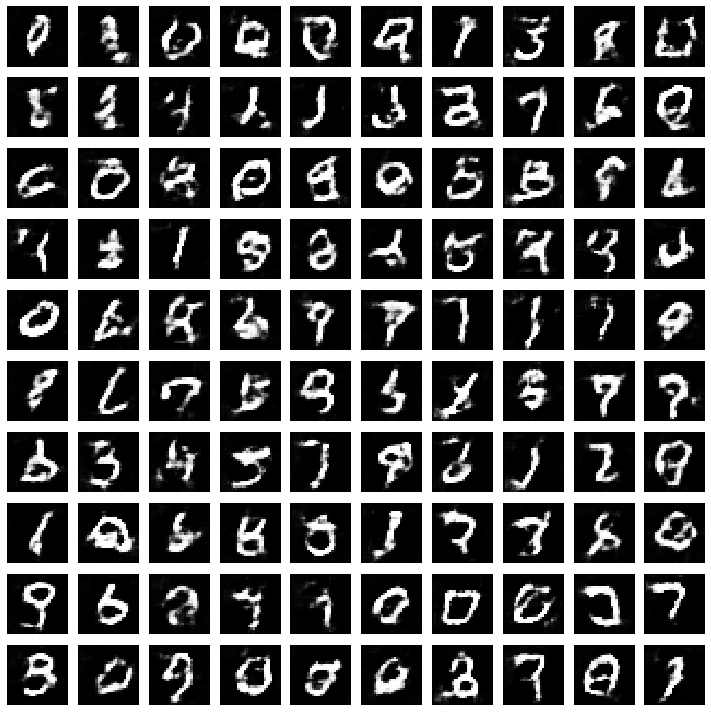

Epoch 6 Disc Loss 0.6925 Generator Loss 0.8259
Epoch 7 Disc Loss 0.6921 Generator Loss 0.8205
Epoch 8 Disc Loss 0.6915 Generator Loss 0.8173
Epoch 9 Disc Loss 0.6909 Generator Loss 0.8159
Epoch 10 Disc Loss 0.6901 Generator Loss 0.8155


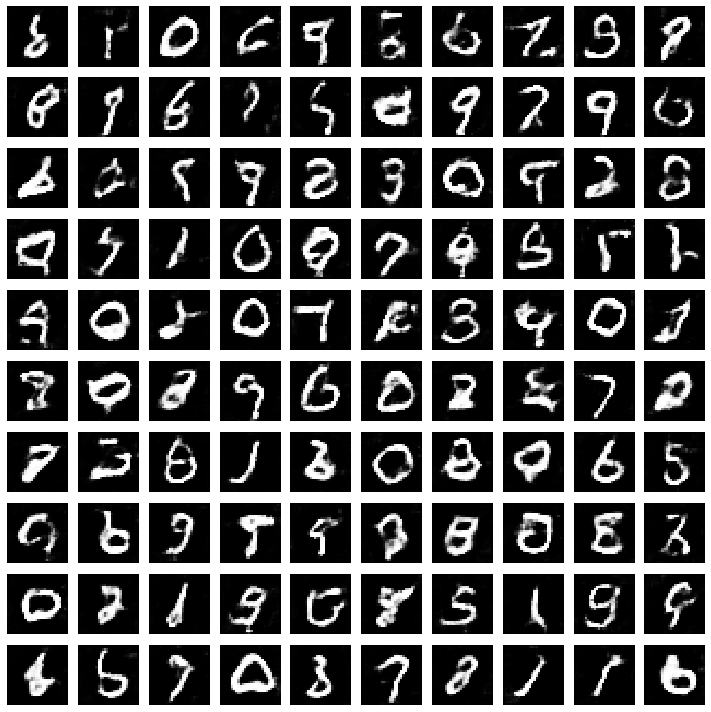

Epoch 11 Disc Loss 0.6894 Generator Loss 0.8199
Epoch 12 Disc Loss 0.6889 Generator Loss 0.8160
Epoch 13 Disc Loss 0.6886 Generator Loss 0.8180
Epoch 14 Disc Loss 0.6884 Generator Loss 0.8170
Epoch 15 Disc Loss 0.6879 Generator Loss 0.8178


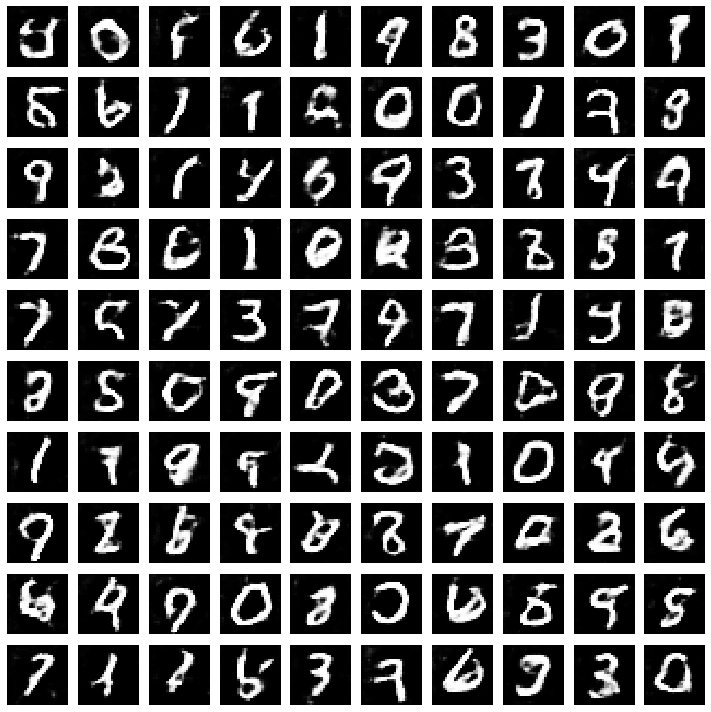

Epoch 16 Disc Loss 0.6875 Generator Loss 0.8209
Epoch 17 Disc Loss 0.6867 Generator Loss 0.8219
Epoch 18 Disc Loss 0.6865 Generator Loss 0.8191
Epoch 19 Disc Loss 0.6862 Generator Loss 0.8190
Epoch 20 Disc Loss 0.6859 Generator Loss 0.8219


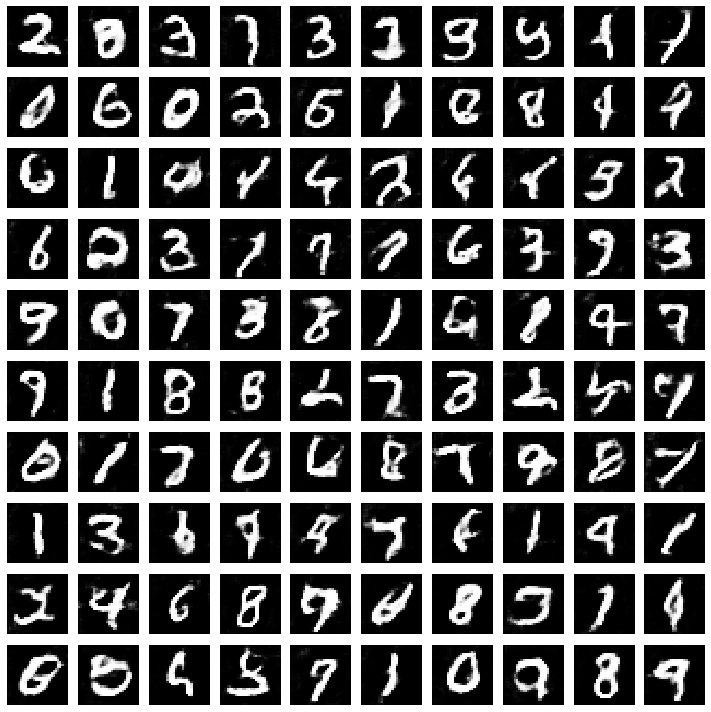

Epoch 21 Disc Loss 0.6844 Generator Loss 0.8363
Epoch 22 Disc Loss 0.6847 Generator Loss 0.8248
Epoch 23 Disc Loss 0.6841 Generator Loss 0.8302
Epoch 24 Disc Loss 0.6834 Generator Loss 0.8300
Epoch 25 Disc Loss 0.6833 Generator Loss 0.8285


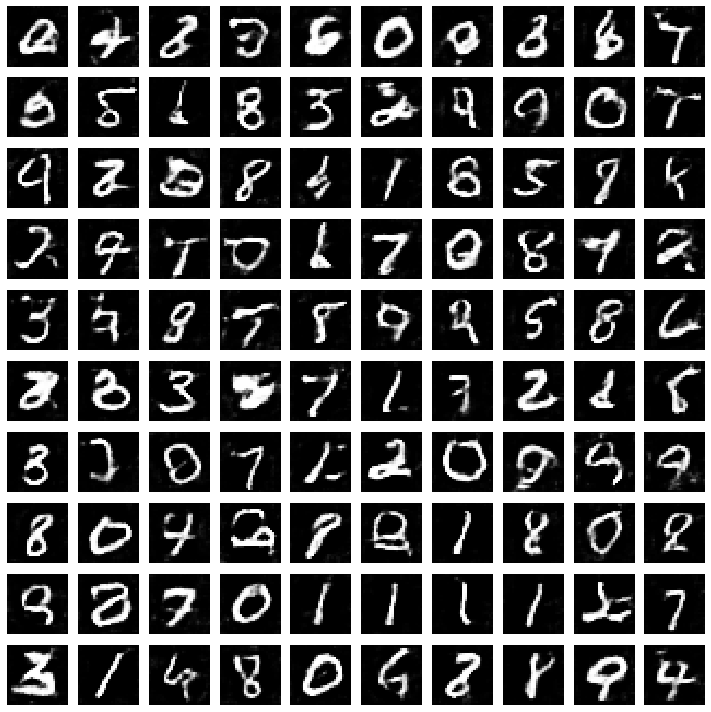

Epoch 26 Disc Loss 0.6828 Generator Loss 0.8320
Epoch 27 Disc Loss 0.6812 Generator Loss 0.8512
Epoch 28 Disc Loss 0.6795 Generator Loss 0.8543
Epoch 29 Disc Loss 0.6806 Generator Loss 0.8374
Epoch 30 Disc Loss 0.6800 Generator Loss 0.8419


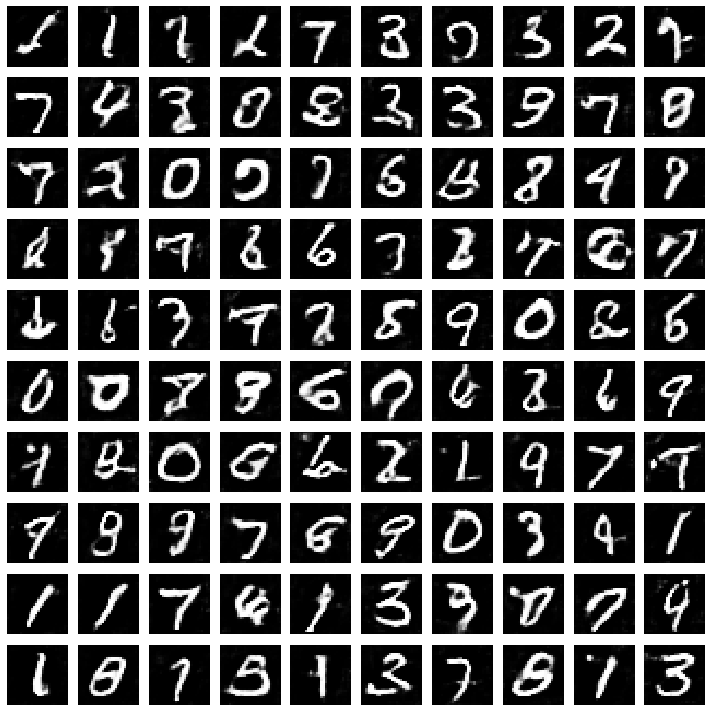

Epoch 31 Disc Loss 0.6793 Generator Loss 0.8453
Epoch 32 Disc Loss 0.6783 Generator Loss 0.8505
Epoch 33 Disc Loss 0.6776 Generator Loss 0.8577
Epoch 34 Disc Loss 0.6772 Generator Loss 0.8544
Epoch 35 Disc Loss 0.6760 Generator Loss 0.8593


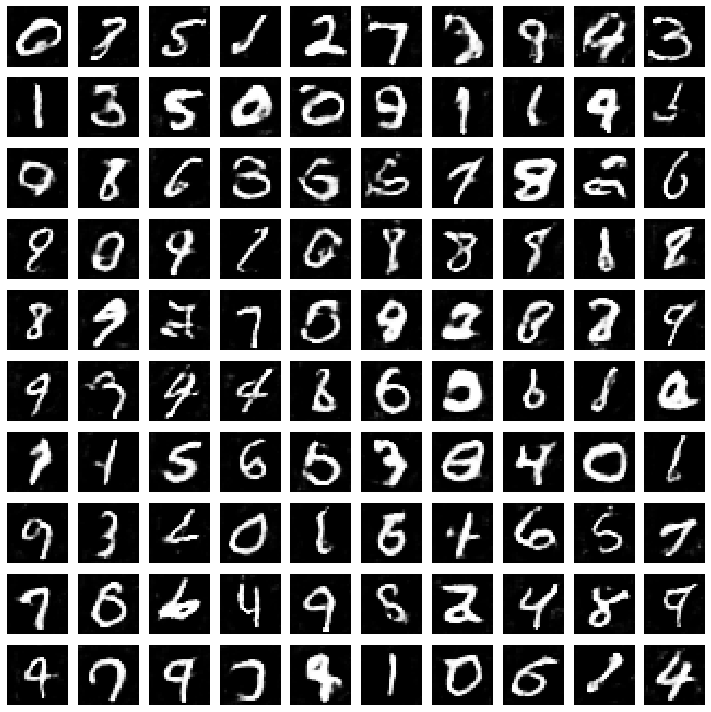

Epoch 36 Disc Loss 0.6758 Generator Loss 0.8616
Epoch 37 Disc Loss 0.6745 Generator Loss 0.8675
Epoch 38 Disc Loss 0.6736 Generator Loss 0.8681
Epoch 39 Disc Loss 0.6729 Generator Loss 0.8733
Epoch 40 Disc Loss 0.6712 Generator Loss 0.8780


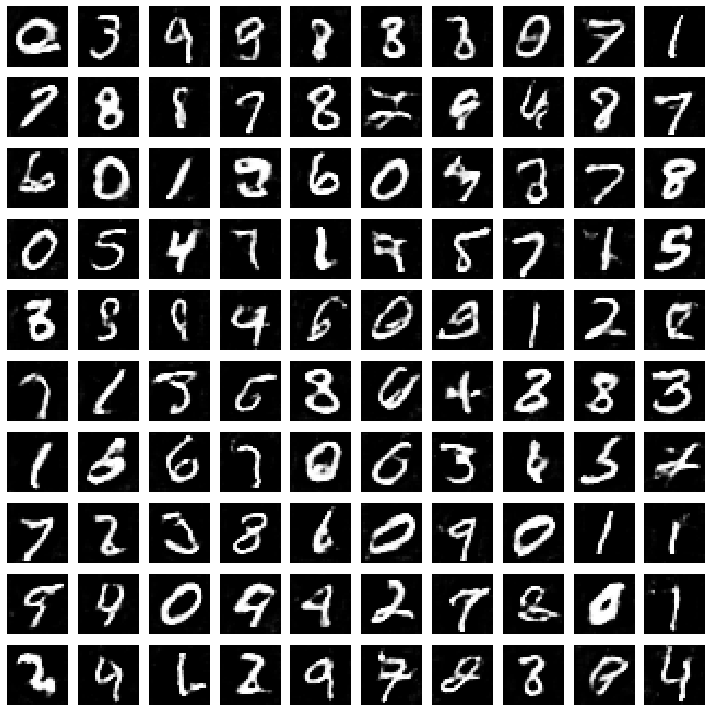

Epoch 41 Disc Loss 0.6706 Generator Loss 0.8837
Epoch 42 Disc Loss 0.6693 Generator Loss 0.8857
Epoch 43 Disc Loss 0.6684 Generator Loss 0.8907
Epoch 44 Disc Loss 0.6673 Generator Loss 0.8957
Epoch 45 Disc Loss 0.6658 Generator Loss 0.9017


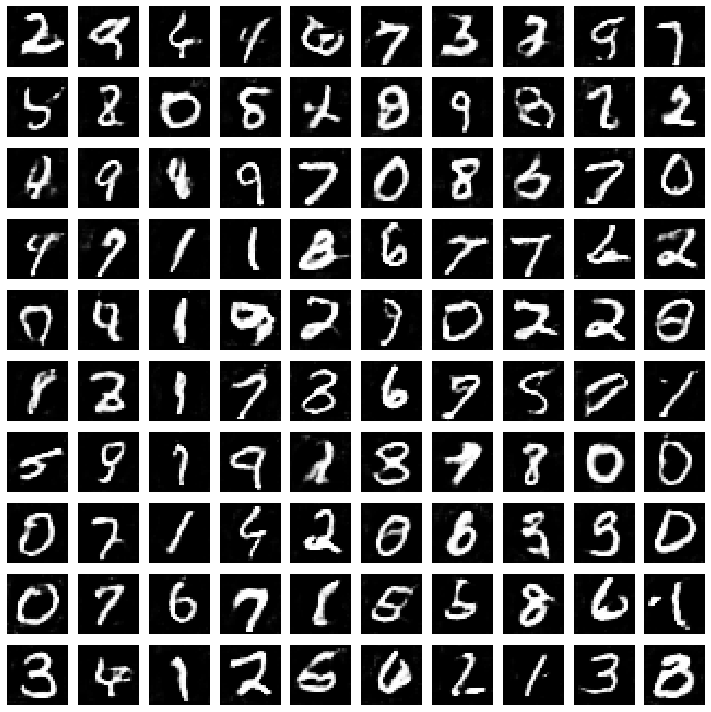

Epoch 46 Disc Loss 0.6652 Generator Loss 0.9038
Epoch 47 Disc Loss 0.6640 Generator Loss 0.9139
Epoch 48 Disc Loss 0.6626 Generator Loss 0.9144
Epoch 49 Disc Loss 0.6608 Generator Loss 0.9207
Epoch 50 Disc Loss 0.6594 Generator Loss 0.9284


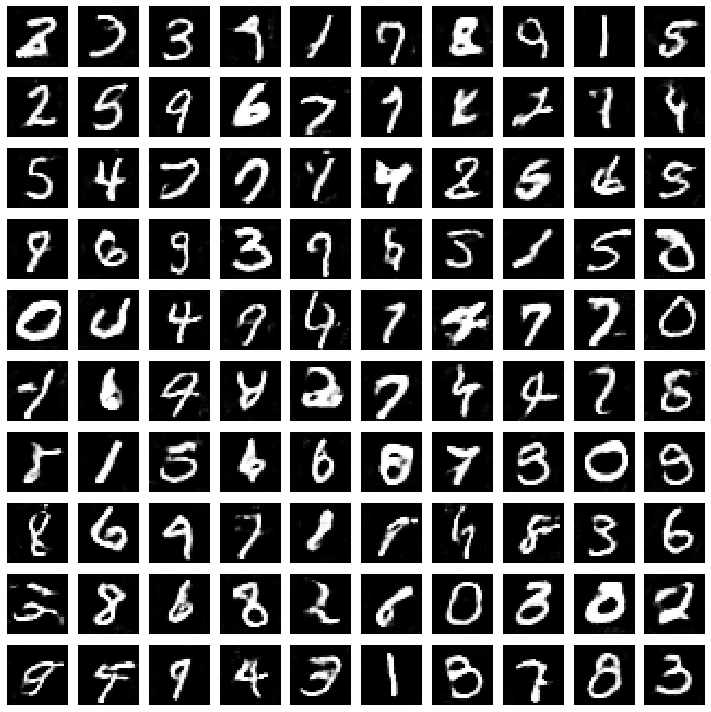

In [9]:
# Training Loop
d_losses = []
g_losses = []

for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE) #From a range of 0 to 60,000 it will pick 128 real images
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM)) #Will generate a random image
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1)) #Fake images have zero
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #So discriminator will try to give high values for real, but if it fails loss will be high
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)  #It will try to give low value for fake generated images, so generator will raise its game
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake #Total loss
        
        epoch_d_loss += d_loss

#Train Generator (Complete Model Generator + Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        #We can see that both the losses are stable because generator is getting better at producing images while discriminator is getting better at making fake
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES) #Storing all losses of discriminator
    g_losses.append(epoch_g_loss/NO_OF_BATCHES) #Storing all losses of generator
    
    if (epoch+1)%5==0:
      show_imgs(epoch)

#Thanks to increase in spatial area and number of filters we are getting much better quality images in Convolutional GAN than MLP GAN